In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

In [2]:
df=pd.read_csv("seattleWeather_1948-2017.csv")
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [3]:
df.shape

(25551, 5)

In [4]:
df.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

In [5]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [6]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [7]:
# Finding and Treating Null Values
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [8]:
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


<AxesSubplot:xlabel='RAIN', ylabel='count'>

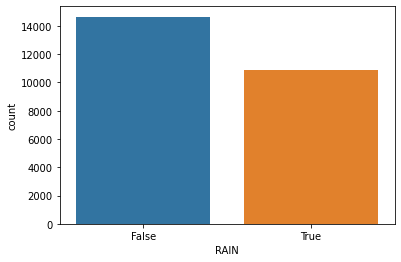

In [18]:
sns.countplot(data=df,x='RAIN')

In [10]:
df['PRCP'].mean()

0.10622162204477956

In [20]:
def RAIN_INSERTION(cols):
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return False
    else:
        return RAIN
    
    

In [19]:
def PRCP_INSERTION(cols):
    PRCP=cols[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP

In [22]:
df['RAIN']=df[['RAIN']].apply(RAIN_INSERTION,axis=1)

In [23]:
df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)

In [24]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [25]:
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [26]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

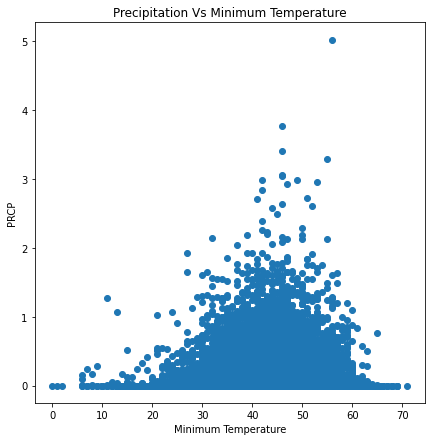

In [29]:
#Plot graph to determine the correlation between Precipitation and Minimum Temperature
plt.figure(figsize=(7,7))
plt.scatter(x='TMIN',y='PRCP',data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')


Text(0.5, 1.0, 'Precipitation Vs Maximum Temperature')

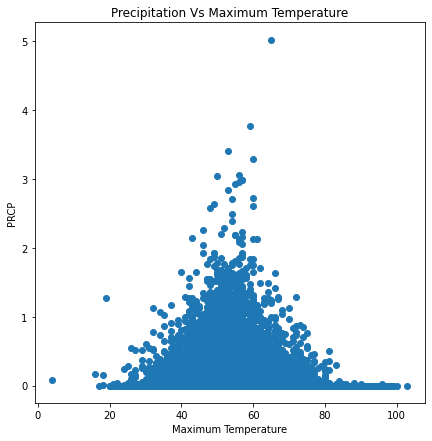

In [30]:
#Plot graph to determine the correlation between Precipitation and Maximum Temperature
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX',y='PRCP',data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature')

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TMIN', ylabel='Density'>

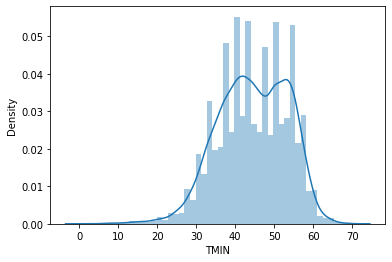

In [32]:
#Plot graph to determine the overall distribution of minimum temperature
sns.distplot (df['TMIN'])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TMAX', ylabel='Density'>

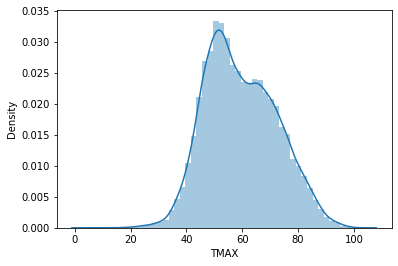

In [33]:
#Plot graph to determine the overall distribution of maximum temperature
sns.distplot (df['TMAX'])

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


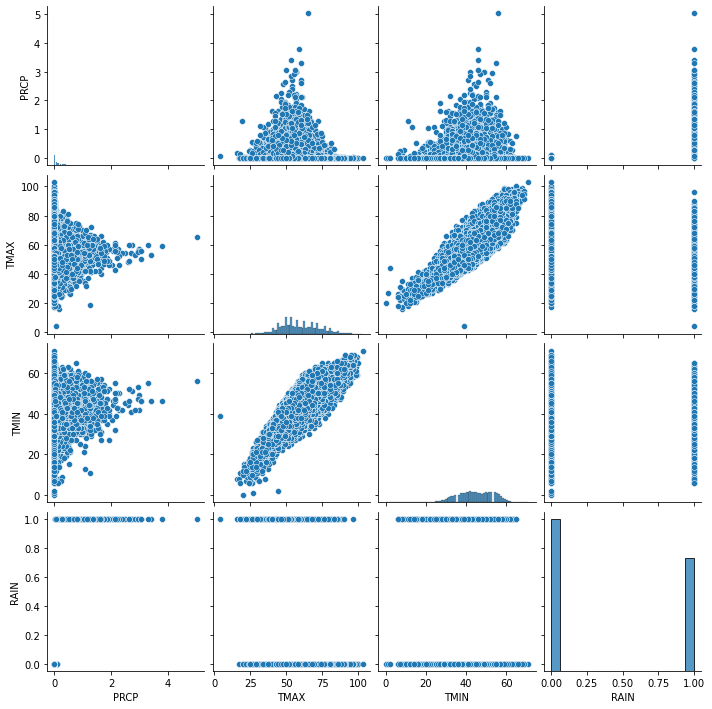

In [34]:
sns.pairplot(data=df)

<AxesSubplot:>

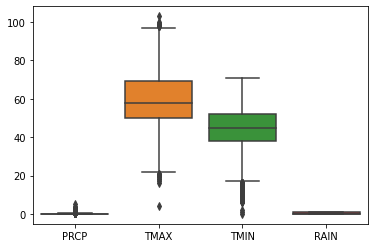

In [35]:
#Plot graph to determine the outliers in precipitation, maximum temperature, and minimum temperature
sns.boxplot(data=df)

In [38]:
#Outlier Treatment
df=df.drop(df[df['TMIN']<17].index)

In [45]:
df=df.drop(df[(df['TMAX']>97)| (df['TMAX']<22)].index)

In [47]:
df=df.drop(df[(df['PRCP']>0.25) |(df['PRCP']<-0.15)].index)

<AxesSubplot:>

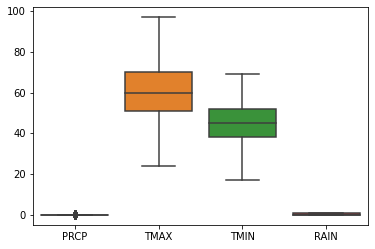

In [48]:
#Let's check whether the outliers are removed or not.
sns.boxplot(data=df)

In [49]:
#Importing Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [58]:
lr=LogisticRegression()

In [51]:
##Importing "train_test-split" function to test the model
from sklearn.model_selection import train_test_split


In [62]:
##Splitting of data as X (Features) and y (Target or label) happens here.
X=df.drop(['RAIN','DATE'],axis=1)
y=df['RAIN']
y=y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                                            

In [67]:
lr.fit(X_train,y_train).score(X_train,y_train)

0.9162153344208809

In [68]:
prediction=lr.predict(X_test)

In [69]:
print(X_test.head())

       PRCP  TMAX  TMIN
17837  0.00    54    35
18134  0.10    74    59
9993   0.00    64    42
12055  0.00    43    38
8866   0.07    54    34


In [70]:
prediction

array(['False', 'True', 'False', ..., 'False', 'False', 'False'],
      dtype=object)

In [71]:
y_test

17837    False
18134     True
9993     False
12055    False
8866      True
         ...  
4047      True
18866    False
22853    False
25535    False
21369     True
Name: RAIN, Length: 6568, dtype: object

In [ ]:
The accuracy score is 91%. It means the model is predicting fairly well.